# Machine-Learning - Task 3 Seeds-Clustering
This task involves clustering different types of wheat seeds based on their physical characteristics. 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

### 1. Load Dataset

In [2]:
# Load Dataset
file_path = r"C:\Users\femij\Downloads\seeds_dataset.txt"
Seeds_data = pd.read_csv(file_path, sep="\t+", header=None, engine='python')
Seeds_data.columns = [
    "area", "perimeter", "compactness", "length_kernel", "width_kernel",
    "asymmetry_coefficient", "length_kernel_groove", "target"
]

### 2. Exploring the Dataset

In [3]:
Seeds_data.head() # Preview the frist few rows Dataset

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
Seeds_data.info() # Exploring the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length_kernel          210 non-null    float64
 4   width_kernel           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   length_kernel_groove   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
Seeds_data.describe() # Exploring the dataset Statistic

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
# Check for missing values
print(Seeds_data.isnull().sum())

area                     0
perimeter                0
compactness              0
length_kernel            0
width_kernel             0
asymmetry_coefficient    0
length_kernel_groove     0
target                   0
dtype: int64


### 3. Visualization

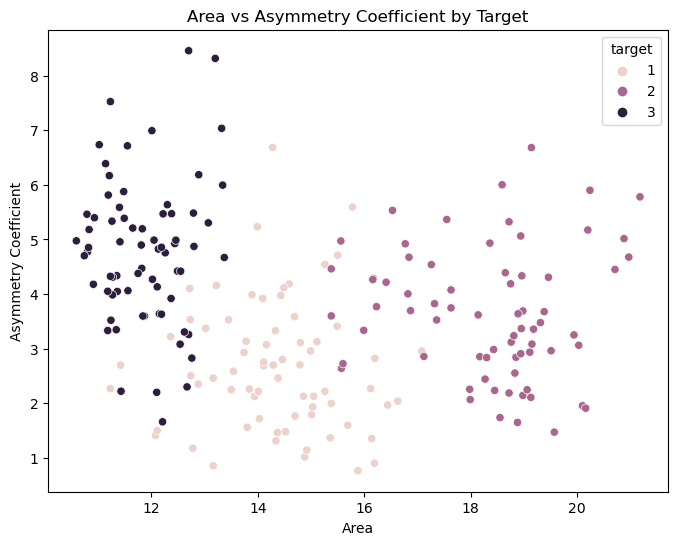

In [7]:
# Scatter plot of area vs asymmetry coefficient colored by target
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area", y="asymmetry_coefficient", data=Seeds_data, hue="target", legend="full")
plt.title("Area vs Asymmetry Coefficient by Target")
plt.xlabel("Area")
plt.ylabel("Asymmetry Coefficient")
plt.show()

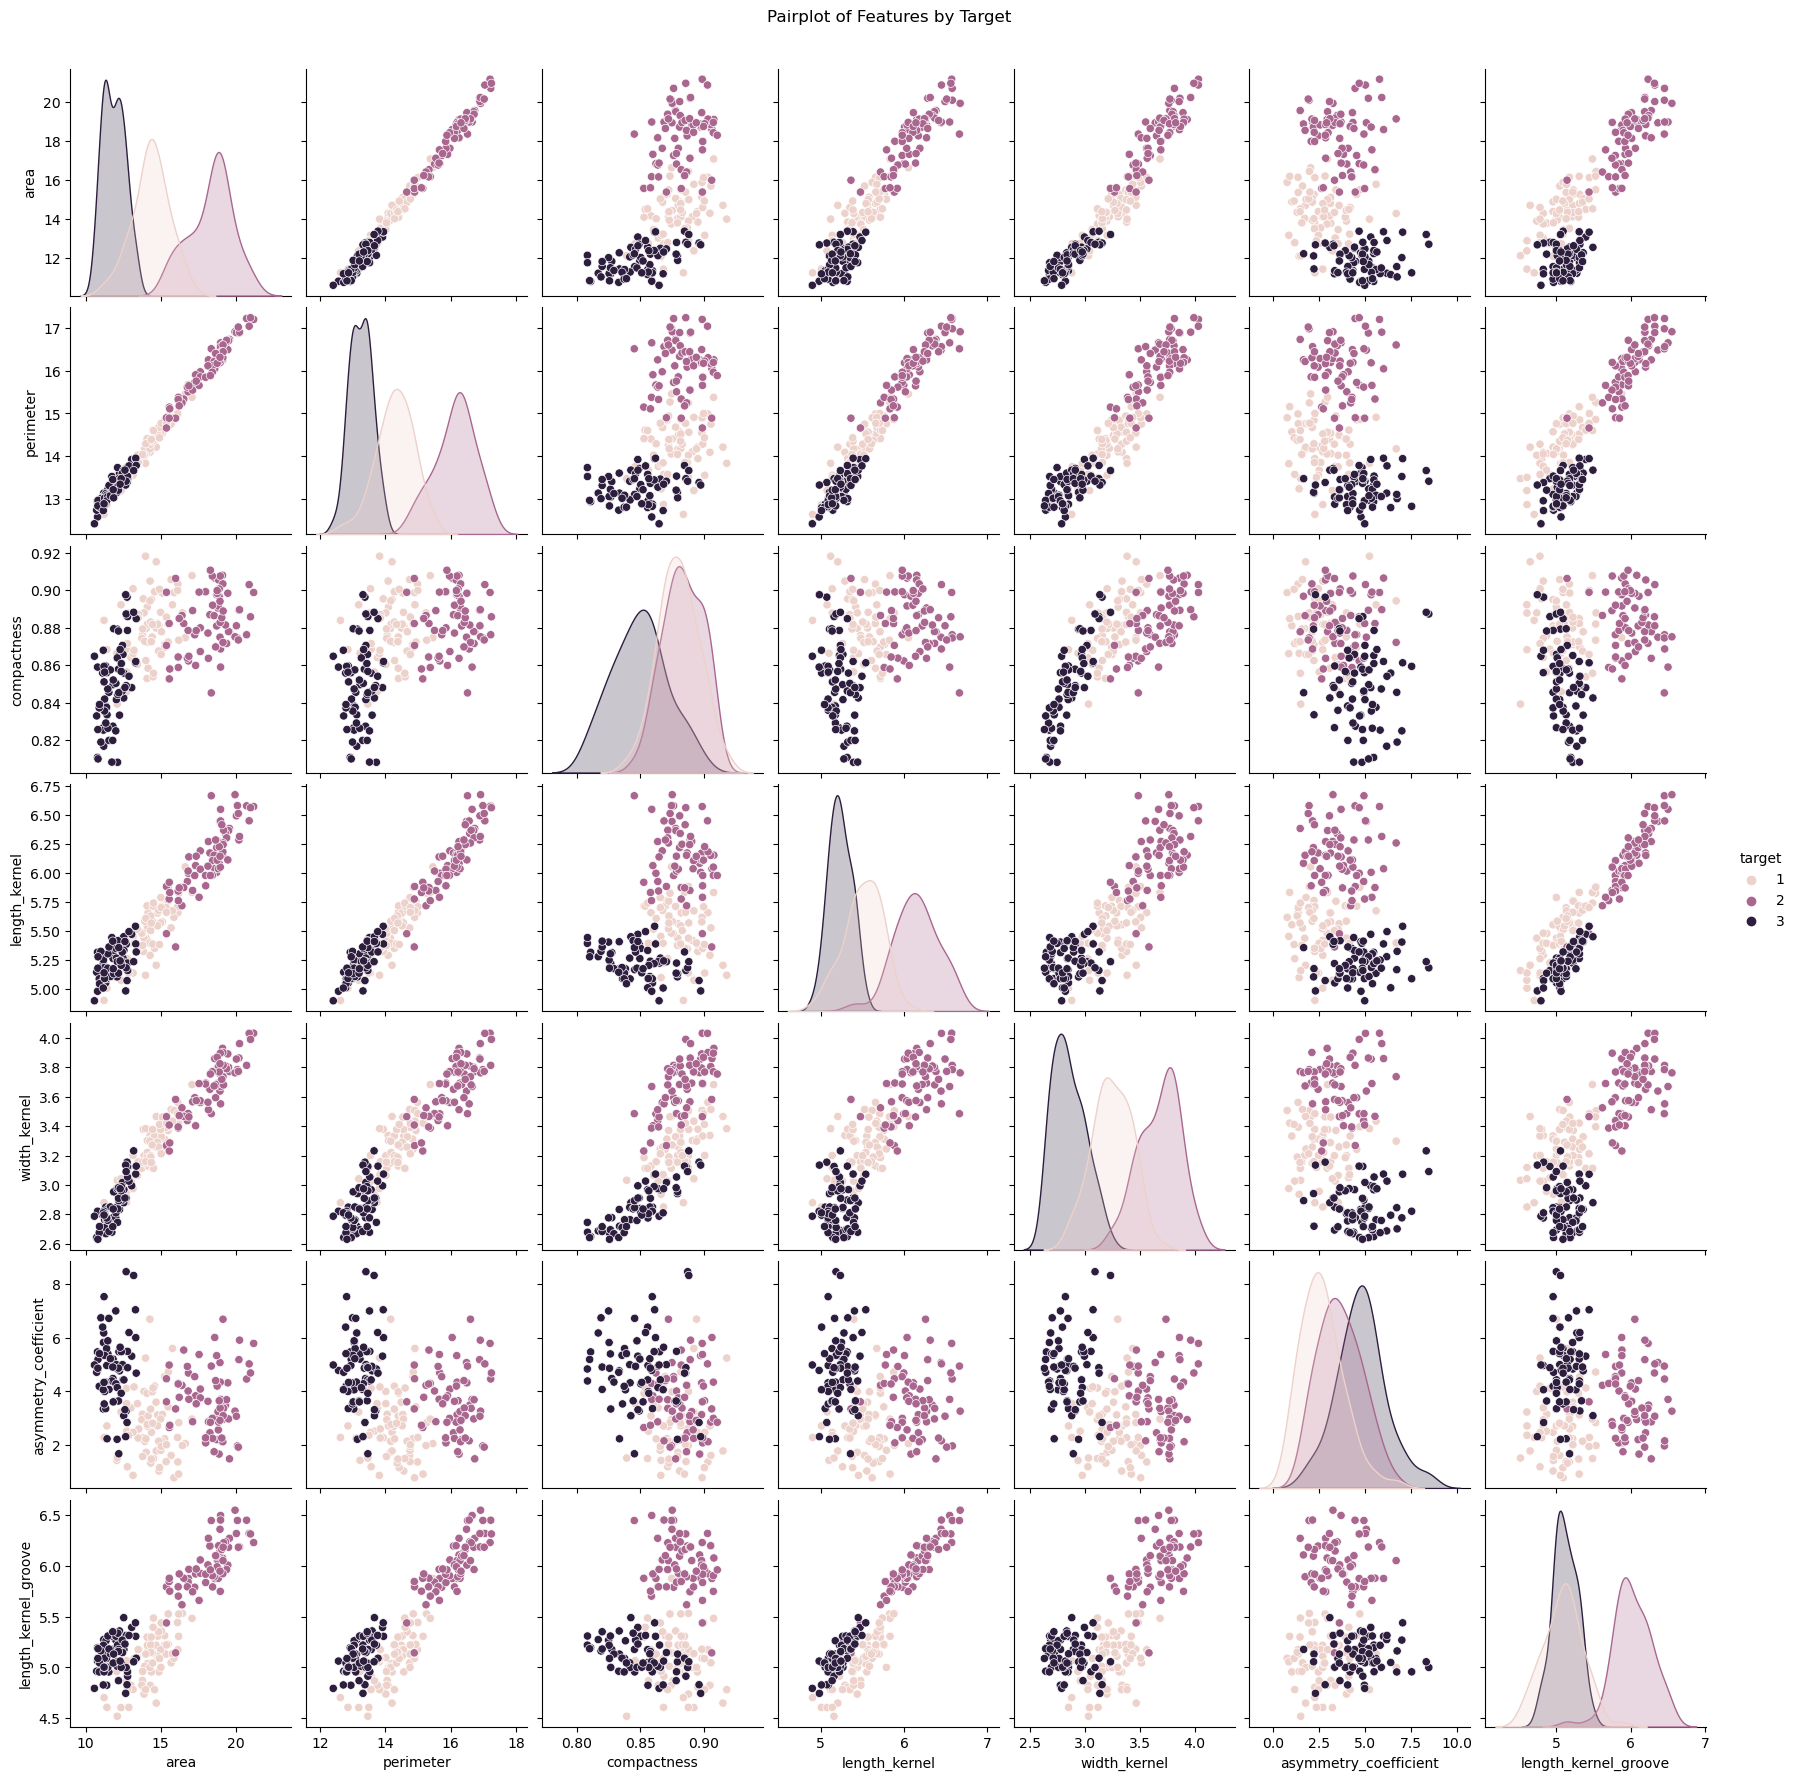

In [10]:
# Pairplot for deeper insights
sns.pairplot(Seeds_data, hue="target")
plt.suptitle("Pairplot of Features by Target", y=1.02)
plt.show()

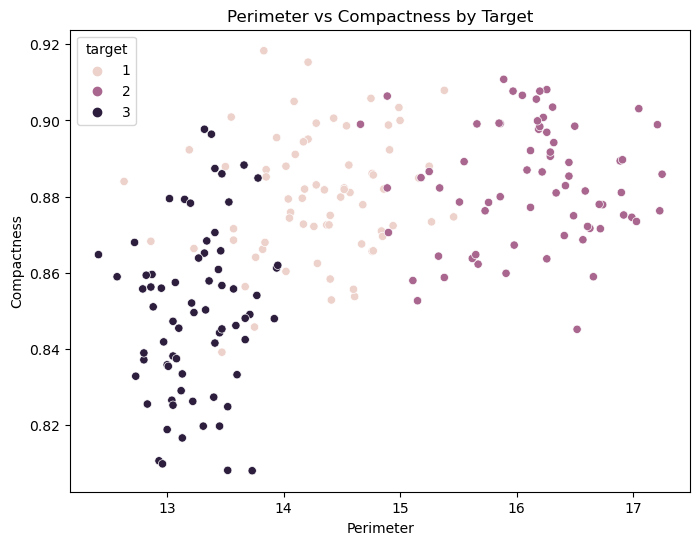

In [11]:
# Scatter plot of perimeter vs compactness
plt.figure(figsize=(8, 6))
sns.scatterplot(x="perimeter", y="compactness", data=Seeds_data, hue="target")
plt.title("Perimeter vs Compactness by Target")
plt.xlabel("Perimeter")
plt.ylabel("Compactness")
plt.show()

### 4. Data Processing and Modeling

In [12]:
# Clustering Model: Finding Optimal Number of Clusters using the Elbow Method
X = Seeds_data.drop(columns="target")  # Features only, drop the target

# Initialize dictionaries to store inertia and homogeneity values
inertia = {}
homogeneity = {}

# Loop over candidate number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia[k] = kmeans.inertia_

    # Calculate homogeneity only if k > 1
    if k > 1:
        homogeneity[k] = homogeneity_score(Seeds_data["target"], kmeans.labels_)

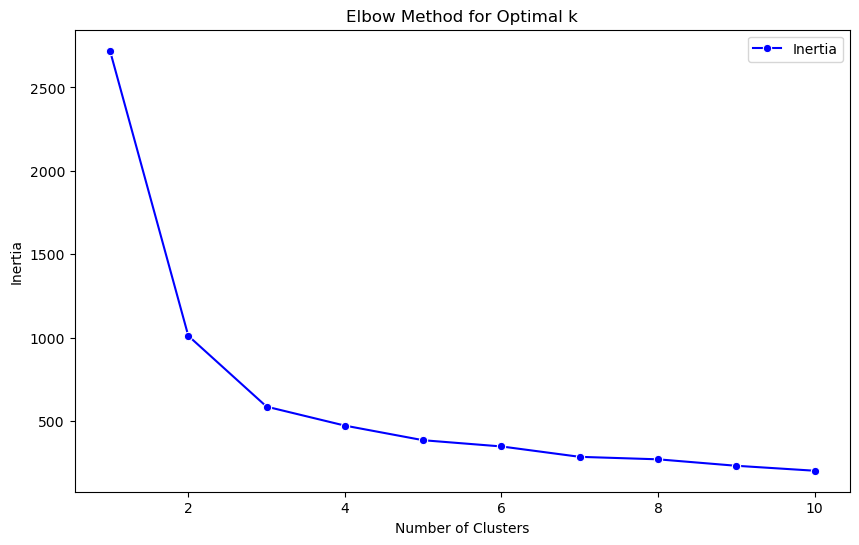

In [13]:
# Plot Elbow Method for Inertia
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()), marker="o", color="blue", label="Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

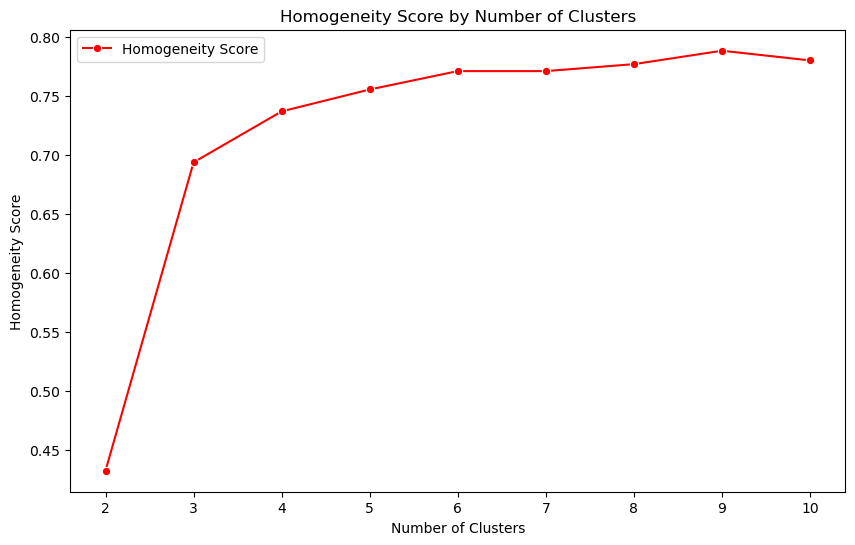

In [14]:
# Plot Homogeneity Score
if len(homogeneity) > 0:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=list(homogeneity.keys()), y=list(homogeneity.values()), marker="o", color="red", label="Homogeneity Score")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Homogeneity Score")
    plt.title("Homogeneity Score by Number of Clusters")
    plt.show()

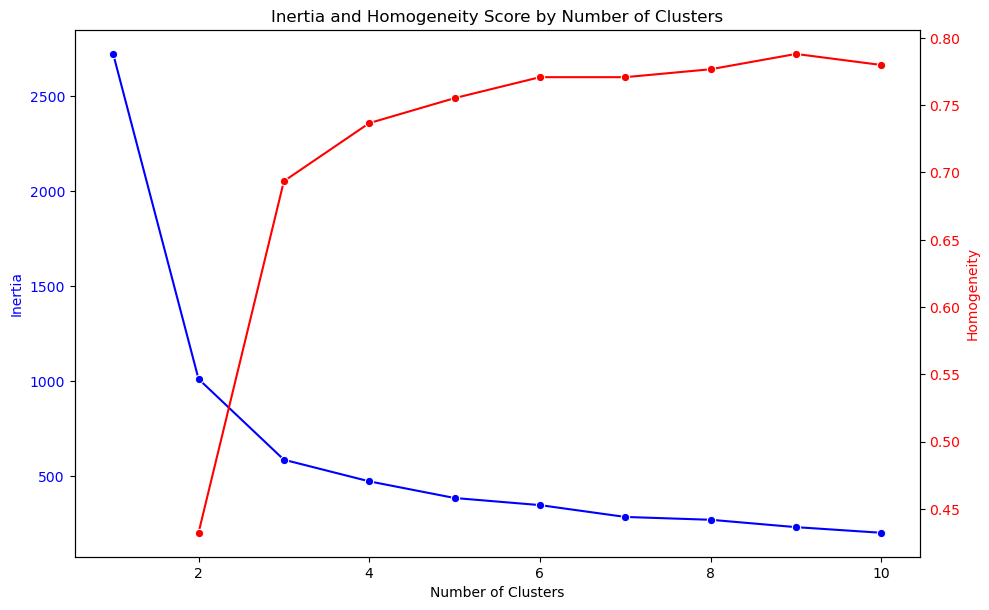

In [16]:
# Overlay Inertia and Homogeneity on a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# Inertia plot
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia", color="blue")
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()), ax=ax1, color="blue", marker="o")
ax1.tick_params(axis='y', labelcolor="blue")

# Homogeneity plot on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Homogeneity", color="red")
sns.lineplot(x=list(homogeneity.keys()), y=list(homogeneity.values()), ax=ax2, color="red", marker="o")
ax2.tick_params(axis='y', labelcolor="red")
fig.tight_layout()
plt.title("Inertia and Homogeneity Score by Number of Clusters")
plt.show()

In [17]:
# Clustering with Optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
Seeds_data['cluster'] = kmeans.fit_predict(X)

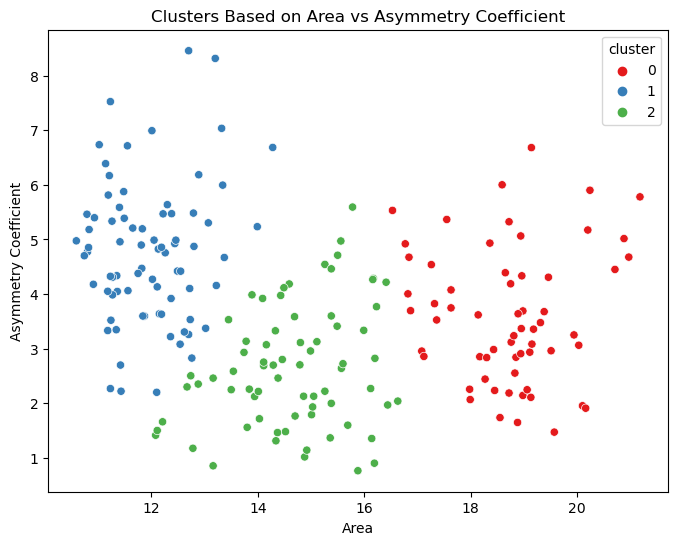

In [18]:
# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area", y="asymmetry_coefficient", data=Seeds_data, hue="cluster", palette="Set1", legend="full")
plt.title("Clusters Based on Area vs Asymmetry Coefficient")
plt.xlabel("Area")
plt.ylabel("Asymmetry Coefficient")
plt.show()

### 5. Prediction (Testing the Model)

In [19]:
# Testing Predictions
# Select 3 data points for prediction
sample_data = X.iloc[[0, 100, 200]]
cluster_predictions = kmeans.predict(sample_data)

In [20]:
# Display predictions
for i, cluster in enumerate(cluster_predictions, 1):
    print(f"Sample {i}: Assigned to Cluster {cluster}")

Sample 1: Assigned to Cluster 2
Sample 2: Assigned to Cluster 2
Sample 3: Assigned to Cluster 1


### End